<a href="https://colab.research.google.com/github/juliuslaggah/Machine_learning/blob/main/BasketAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

1. Uploading the Files

In [34]:
from google.colab import files
uploaded = files.upload()


Saving productList.txt to productList (4).txt
Saving Sales1998.txt to Sales1998 (4).txt


2. Loading and Exploring the Data

In [35]:
# Count the number of transactions in Sales1998.txt
with open('Sales1998.txt', 'r') as f:
    transactions = f.readlines()

print("Number of transactions in Sales1998.txt:", len(transactions))

# For the product list, we need to process each line.
# Each line looks like: 1 "Washington Berry Juice"
product_lines = []
with open('productList.txt', 'r') as f:
    product_lines = f.readlines()

# Process the product lines into a dictionary mapping product_id -> product_name
products = {}
import re
for line in product_lines:
    # Use regex to capture product id and product name in quotes.
    match = re.match(r'(\d+)\s+"(.+)"', line.strip())
    if match:
        prod_id = match.group(1)
        prod_name = match.group(2)
        products[prod_id] = prod_name

print("Number of products in productList.txt:", len(products))


Number of transactions in Sales1998.txt: 34070
Number of products in productList.txt: 1560


3. Preparing the Transactions Data

In [36]:
# Convert each transaction from a string to a list of product IDs
transactions = [line.strip().split() for line in transactions]

# Display the first few transactions
print("Example transaction:", transactions[0])


Example transaction: ['177', '1065']


In [37]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

# Show a sample of the one-hot encoded DataFrame
df.head(1559)


,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1555,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1556,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1557,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


4. Applying the FP-Growth Algorithm

In [67]:
from mlxtend.frequent_patterns import fpgrowth

# Generate frequent itemsets using FP-Growth
frequent_itemsets_fp = fpgrowth(df, min_support=0.0001, use_colnames=True)

print("Number of frequent itemsets found (FP-Growth):", len(frequent_itemsets_fp))
print(frequent_itemsets_fp.sort_values(by='support', ascending=False).head())


Number of frequent itemsets found (FP-Growth): 12520
       support itemsets
1241  0.004197    (277)
571   0.004109   (1352)
788   0.004050    (865)
715   0.004050    (846)
1135  0.004021    (827)


5. Generating Association Rules

In [68]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.05)

# Display results
print("Number of association rules (FP-Growth):", len(rules_fp))
rules_fp.sort_values(by="confidence", ascending=False).head()


Number of association rules (FP-Growth): 6421


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
6392,"(1501, 359)",(509),0.000117,0.003170,0.000117,1.0,315.462963,1.0,0.000117,inf,0.996947,0.037037,1.0,0.518519
7,"(876, 653)",(177),0.000117,0.002994,0.000117,1.0,334.019608,1.0,0.000117,inf,0.997123,0.039216,1.0,0.519608
6386,"(499, 1025)","(66, 343, 1441)",0.000117,0.000117,0.000117,1.0,8517.500000,1.0,0.000117,inf,1.000000,1.000000,1.0,1.000000
6398,"(1509, 1332)",(184),0.000117,0.003023,0.000117,1.0,330.776699,1.0,0.000117,inf,0.997094,0.038835,1.0,0.519417
2861,"(968, 1080, 991, 175)","(171, 564)",0.000117,0.000176,0.000117,1.0,5678.333333,1.0,0.000117,inf,0.999941,0.666667,1.0,0.833333


In [69]:
strong_rules = rules_fp[(rules_fp['confidence'] > 0.8) & (rules_fp['lift'] > 2)]
strong_rules.sort_values(by="lift", ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1145,"(1099, 889)","(706, 1305)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
1150,"(706, 1305)","(1099, 889)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
5569,"(399, 295)","(1304, 888)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
5631,"(120, 1435)","(1362, 859)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
5636,"(1362, 859)","(120, 1435)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
5727,"(1042, 732)","(526, 316)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
5728,"(526, 316)","(1042, 732)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
1808,"(131, 1506)","(497, 208)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
1810,"(131, 208)","(497, 1506)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
1811,"(497, 1506)","(131, 208)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0


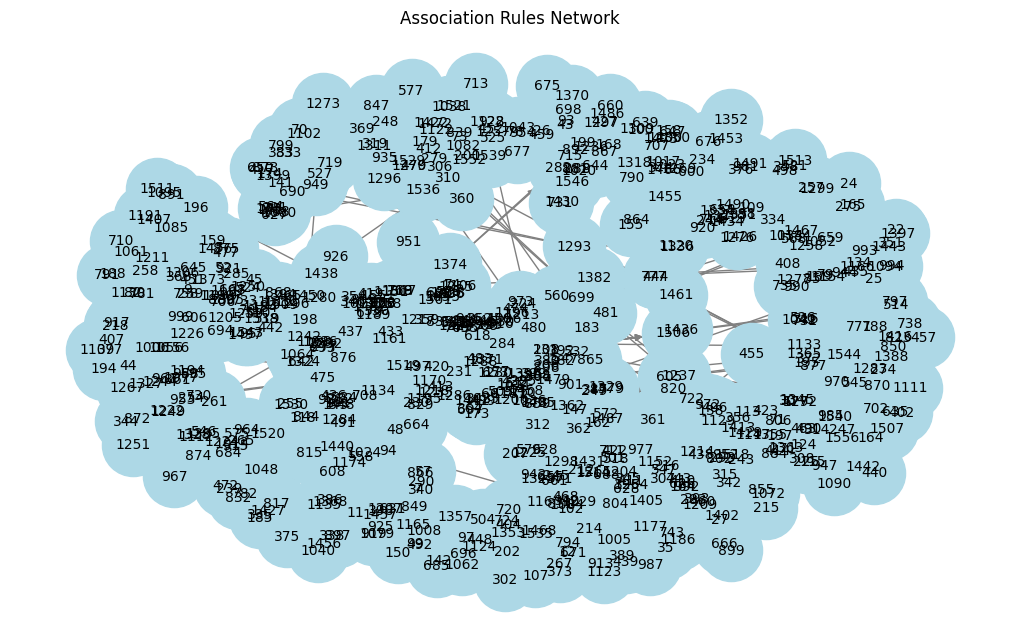

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.DiGraph()

# Add edges based on association rules
for _, row in strong_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['confidence'])

# Draw graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", edge_color="gray", font_size=10)
plt.title("Association Rules Network")
plt.show()


ADVANCE FUNCTION.
1️⃣ Filtering Strong Association Rules

In [71]:
# Filter rules based on confidence and lift
strong_rules = rules_fp[(rules_fp['confidence'] > 0.8) & (rules_fp['lift'] > 2)]

# Sort by lift to get the strongest rules
strong_rules_sorted = strong_rules.sort_values(by="lift", ascending=False)

# Display the top 10 strongest rules
strong_rules_sorted.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1145,"(1099, 889)","(706, 1305)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
1150,"(706, 1305)","(1099, 889)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
5569,"(399, 295)","(1304, 888)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
5631,"(120, 1435)","(1362, 859)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
5636,"(1362, 859)","(120, 1435)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
5727,"(1042, 732)","(526, 316)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
5728,"(526, 316)","(1042, 732)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
1808,"(131, 1506)","(497, 208)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
1810,"(131, 208)","(497, 1506)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0
1811,"(497, 1506)","(131, 208)",0.000117,0.000117,0.000117,1.0,8517.5,1.0,0.000117,inf,1.0,1.0,1.0,1.0


2️⃣ Visualization of Association Rules

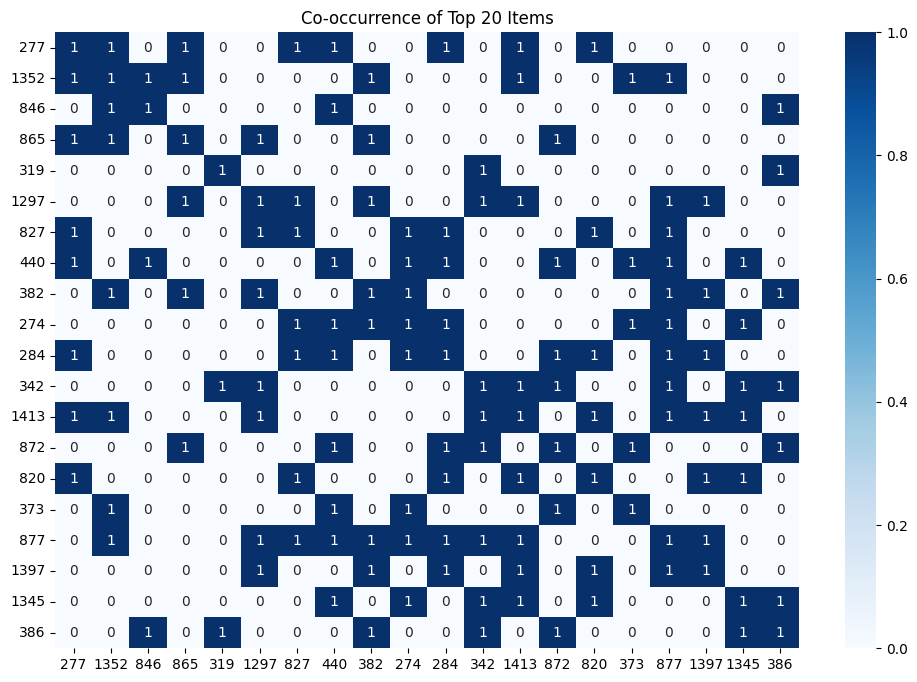

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top 20 frequent items
top_items = df.sum().sort_values(ascending=False).head(20).index

# Create co-occurrence matrix
co_occurrence_matrix = df[top_items].T.dot(df[top_items])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap="Blues", fmt=".0f")
plt.title("Co-occurrence of Top 20 Items")
plt.show()


Network Graph of Association Rules

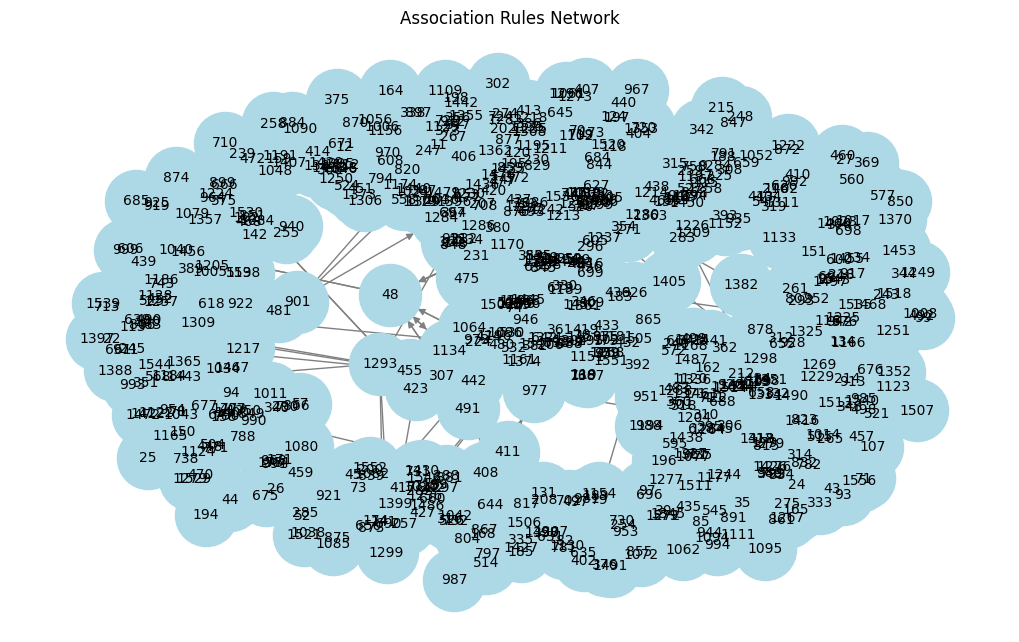

In [73]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges from strong association rules
for _, row in strong_rules_sorted.iterrows():
    for antecedent in row["antecedents"]:
        for consequent in row["consequents"]:
            G.add_edge(antecedent, consequent, weight=row["confidence"])

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", edge_color="gray", font_size=10)
plt.title("Association Rules Network")
plt.show()
